# Assignment 3: Regularization and gredient descent

In this assignment we will implement the ridge regularization method using gradient descent and stochastic gradient descent and test it on "Wine quality" data.

## Download the "Communities and Crime" dataset and preprocess the data

We will start by downloading the dataset and loading it into a dataframe. The target value is the last column called **ViolentCrimesPerPop**.

In [75]:
import pandas as pd

with open("data/communities.names") as f:
    columns = [l.split(" ")[1] for l in f.readlines() if l.startswith("@attribute")]

communities_crime = pd.read_csv('data/communities.data', header=None, names=columns, na_values='?')
communities_crime.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Now we have to remove the attributes state, county, community, community name, and fold, which are columns from 1 to 5.

In [76]:
communities_crime = communities_crime.drop(columns=["state", "county", "community", "communityname", "fold"])
communities_crime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Now let's take care of the missing values.

In [77]:
missing_ratio = communities_crime.isnull().mean()
missing_ratio = missing_ratio[missing_ratio > 0]
missing_ratio

OtherPerCap             0.000502
LemasSwornFT            0.840020
LemasSwFTPerPop         0.840020
LemasSwFTFieldOps       0.840020
LemasSwFTFieldPerPop    0.840020
LemasTotalReq           0.840020
LemasTotReqPerPop       0.840020
PolicReqPerOffic        0.840020
PolicPerPop             0.840020
RacialMatchCommPol      0.840020
PctPolicWhite           0.840020
PctPolicBlack           0.840020
PctPolicHisp            0.840020
PctPolicAsian           0.840020
PctPolicMinor           0.840020
OfficAssgnDrugUnits     0.840020
NumKindsDrugsSeiz       0.840020
PolicAveOTWorked        0.840020
PolicCars               0.840020
PolicOperBudg           0.840020
LemasPctPolicOnPatr     0.840020
LemasGangUnitDeploy     0.840020
PolicBudgPerPop         0.840020
dtype: float64

Now we know that 23 attributes contain missing values.
1. Since for 22 of the columns have more than 80% of the data missing, it is better to drop the columns, because imputing values would not be so informative.
2. One of the columns called **OtherPepCap** is missing only one value, which means that we can impute some value in that row.

In [78]:
# Drop the columns, which have more than 80% missing data
threshold = 0.8
columns_to_drop = missing_ratio[missing_ratio > threshold].index
communities_crime.drop(columns_to_drop, axis=1, inplace=True)

In [79]:
# We will impute the column's value in the missing column with the mean of the other values of this column
mean_value = communities_crime['OtherPerCap'].mean().round(2)
communities_crime['OtherPerCap'] = communities_crime['OtherPerCap'].fillna(mean_value)

The last think we have to do is to divide the dataset into dependent and independant features.

In [80]:
X = communities_crime.iloc[:, :-1].values
y = communities_crime.iloc[:, -1].values

In [81]:
X

array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 0.32],
       [0.  , 0.16, 0.12, ..., 0.12, 0.45, 0.  ],
       [0.  , 0.42, 0.49, ..., 0.21, 0.02, 0.  ],
       ...,
       [0.16, 0.37, 0.25, ..., 0.32, 0.18, 0.91],
       [0.08, 0.51, 0.06, ..., 0.38, 0.33, 0.22],
       [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]])

In [82]:
y

array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])

In the last step we will split the data into training and test sets.

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [84]:
X_train[:1]

array([[0.03, 0.99, 0.13, 0.21, 1.  , 0.44, 0.56, 0.46, 0.31, 0.08, 0.05,
        1.  , 0.87, 0.89, 0.34, 0.58, 0.07, 0.18, 0.12, 0.75, 0.47, 0.52,
        0.56, 0.3 , 0.38, 0.42, 0.51, 0.01, 0.09, 0.16, 0.19, 0.57, 0.23,
        0.74, 0.39, 0.37, 0.18, 0.65, 0.16, 0.4 , 0.18, 0.17, 0.98, 0.93,
        0.89, 0.95, 0.92, 0.66, 0.62, 0.  , 0.08, 0.07, 0.27, 0.39, 0.5 ,
        0.58, 0.67, 0.83, 0.98, 1.  , 0.16, 0.47, 0.66, 0.77, 1.  , 1.  ,
        1.  , 0.92, 0.44, 0.15, 0.5 , 0.01, 0.91, 0.93, 0.03, 0.39, 0.9 ,
        0.03, 0.13, 0.88, 0.89, 0.88, 0.84, 0.95, 1.  , 0.97, 0.65, 0.97,
        0.31, 0.  , 0.  , 1.  , 0.45, 0.35, 0.78, 0.71, 0.02, 0.27, 0.09,
        0.  ]])

In [85]:
y_train[:5]

array([0.2 , 0.07, 0.04, 0.24, 0.54])

In [86]:
X_test[:1]

array([[0.06, 0.46, 0.02, 0.88, 0.2 , 0.2 , 0.36, 0.41, 0.22, 0.34, 0.07,
        1.  , 0.47, 0.6 , 0.12, 0.54, 0.37, 0.34, 0.51, 0.47, 0.42, 0.4 ,
        0.95, 0.21, 0.42, 0.4 , 0.5 , 0.03, 0.17, 0.14, 0.2 , 0.38, 0.29,
        0.57, 0.23, 0.32, 0.27, 0.49, 0.57, 0.28, 0.61, 0.62, 0.46, 0.65,
        0.68, 0.72, 0.55, 0.52, 0.57, 0.01, 0.14, 0.02, 0.25, 0.34, 0.36,
        0.44, 0.11, 0.13, 0.13, 0.15, 0.84, 0.12, 0.19, 0.19, 0.49, 0.51,
        0.45, 0.6 , 0.17, 0.45, 0.5 , 0.06, 0.74, 0.59, 0.12, 0.2 , 0.83,
        0.16, 0.18, 0.36, 0.4 , 0.41, 0.45, 0.49, 0.58, 0.5 , 0.64, 0.66,
        0.19, 0.08, 0.03, 0.19, 0.56, 0.27, 0.16, 0.65, 0.09, 0.12, 0.05,
        0.  ]])

In [87]:
y_test[:5]

array([0.22, 0.04, 0.1 , 0.08, 0.04])

## Fit models using ridge and lasso regression

We will use the Scikit-learn functions for ridge and lasso to fit the models. We will also try different values of the regularization parameter and evaluate its effect, which will help us choose the optimal one.

In [88]:
!pip install tqdm

In [89]:
from tqdm import tqdm
import numpy as np

In [159]:
# Define a set of regularization levels to consider
reg_lvls = np.logspace(-4, 4, 100)

*First* we will start with the **ridge** regression.

In [91]:
from sklearn.linear_model import Ridge

# Define the best score that we want to maximize or minimize
best_score_mse, best_score_mae, best_score_rse, best_score_r2  = None, None, None, None
best_param_mse, best_param_mae, best_param_rse, best_param_r2  = {}, {}, {}, {}
scores_mse_ridge, scores_mae_ridge, scores_rse_ridge, scores_r2_ridge = [], [], [], []

for reg in tqdm(reg_lvls, desc='Regularization levels'):
  # Initialize the RidgeRegressionGD with current set of hyperparameters
  model = Ridge(alpha=reg, max_iter=1000)

  # Fit the model on training data
  model.fit(X_train, y_train)

  # Predict on test data
  y_pred = model.predict(X_test)

  # Calculate the MSE
  mse = np.square(np.subtract(y_test, y_pred)).mean()
  # Calculate the MAE
  mae = np.abs(np.subtract(y_test, y_pred)).mean()
  # Calculate the RSE
  rss = np.square(np.subtract(y_test, y_pred)).sum()
  rse = np.sqrt(rss / (len(y_test) - 2))
  # Calculate the R^2
  tss = np.square(np.subtract(y_test, y_test.mean())).sum()
  r2 = 1 - np.divide(rss, tss)

  scores_mse_ridge.append(mse)
  scores_mae_ridge.append(mae)
  scores_rse_ridge.append(rse)
  scores_r2_ridge.append(r2)

  # If the score is better, update the best score and parameters
  if best_score_mse is None or mse < best_score_mse:
      best_score_mse = mse
      best_params_mse = {'reg_lvl': reg}
  if best_score_mae is None or mae < best_score_mae:
      best_score_mae = mae
      best_params_mae = {'reg_lvl': reg}
  if best_score_rse is None or rse < best_score_rse:
      best_score_rse = rse
      best_params_rse = {'reg_lvl': reg}
  if best_score_r2 is None or r2 > best_score_r2:
      best_score_r2 = r2
      best_params_r2 = {'reg_lvl': reg}


# After the grid search
print()
print(f"Best Parameters (MSE): {best_params_mse}")
print(f"Best Score (MSE): {best_score_mse}")
print(f"Best Parameters (MAE): {best_params_mae}")
print(f"Best Score (MAE): {best_score_mae}")
print(f"Best Parameters (RSE): {best_params_rse}")
print(f"Best Score (RSE): {best_score_rse}")
print(f"Best Parameters (R2): {best_params_r2}")
print(f"Best Score (R2): {best_score_r2}")

Regularization levels: 100%|██████████| 100/100 [00:00<00:00, 178.16it/s]


Best Parameters (MSE): {'reg_lvl': 7.054802310718645}
Best Score (MSE): 0.018937272134723723
Best Parameters (MAE): {'reg_lvl': 10.235310218990268}
Best Score (MAE): 0.09767283599676999
Best Parameters (RSE): {'reg_lvl': 7.054802310718645}
Best Score (RSE): 0.13775099637874216
Best Parameters (R2): {'reg_lvl': 7.054802310718645}
Best Score (R2): 0.6488631743143651


Let's repeat the process for the **lasso** regression.

In [92]:
from sklearn.linear_model import Lasso

# Define the best score that we want to maximize or minimize
best_score_mse, best_score_mae, best_score_rse, best_score_r2  = None, None, None, None
best_param_mse, best_param_mae, best_param_rse, best_param_r2  = {}, {}, {}, {}
scores_mse_lasso, scores_mae_lasso, scores_rse_lasso, scores_r2_lasso = [], [], [], []

for reg in tqdm(reg_lvls, desc='Regularization levels'):
  # Initialize the RidgeRegressionGD with current set of hyperparameters
  model = Lasso(alpha=reg, max_iter=1000)

  # Fit the model on training data
  model.fit(X_train, y_train)

  # Predict on test data
  y_pred = model.predict(X_test)

  # Calculate the MSE
  mse = np.square(np.subtract(y_test, y_pred)).mean()
  # Calculate the MAE
  mae = np.abs(np.subtract(y_test, y_pred)).mean()
  # Calculate the RSE
  rss = np.square(np.subtract(y_test, y_pred)).sum()
  rse = np.sqrt(rss / (len(y_test) - 2))
  # Calculate the R^2
  tss = np.square(np.subtract(y_test, y_test.mean())).sum()
  r2 = 1 - np.divide(rss, tss)

  scores_mse_lasso.append(mse)
  scores_mae_lasso.append(mae)
  scores_rse_lasso.append(rse)
  scores_r2_lasso.append(r2)

  # If the score is better, update the best score and parameters
  if best_score_mse is None or mse < best_score_mse:
      best_score_mse = mse
      best_params_mse = {'reg_lvl': reg}
  if best_score_mae is None or mae < best_score_mae:
      best_score_mae = mae
      best_params_mae = {'reg_lvl': reg}
  if best_score_rse is None or rse < best_score_rse:
      best_score_rse = rse
      best_params_rse = {'reg_lvl': reg}
  if best_score_r2 is None or r2 > best_score_r2:
      best_score_r2 = r2
      best_params_r2 = {'reg_lvl': reg}


# After the grid search
print()
print(f"Best Parameters (MSE): {best_params_mse}")
print(f"Best Score (MSE): {best_score_mse}")
print(f"Best Parameters (MAE): {best_params_mae}")
print(f"Best Score (MAE): {best_score_mae}")
print(f"Best Parameters (RSE): {best_params_rse}")
print(f"Best Score (RSE): {best_score_rse}")
print(f"Best Parameters (R2): {best_params_r2}")
print(f"Best Score (R2): {best_score_r2}")

Regularization levels: 100%|██████████| 100/100 [00:02<00:00, 48.38it/s]


Best Parameters (MSE): {'reg_lvl': 0.0011233240329780276}
Best Score (MSE): 0.01890204822089377
Best Parameters (MAE): {'reg_lvl': 0.0013530477745798076}
Best Score (MAE): 0.09597747516254276
Best Parameters (RSE): {'reg_lvl': 0.0011233240329780276}
Best Score (RSE): 0.13762282618689908
Best Parameters (R2): {'reg_lvl': 0.0011233240329780276}
Best Score (R2): 0.6495162997065802


Now let's visualize scores from both regressions.

In [93]:
import matplotlib.pyplot as plt

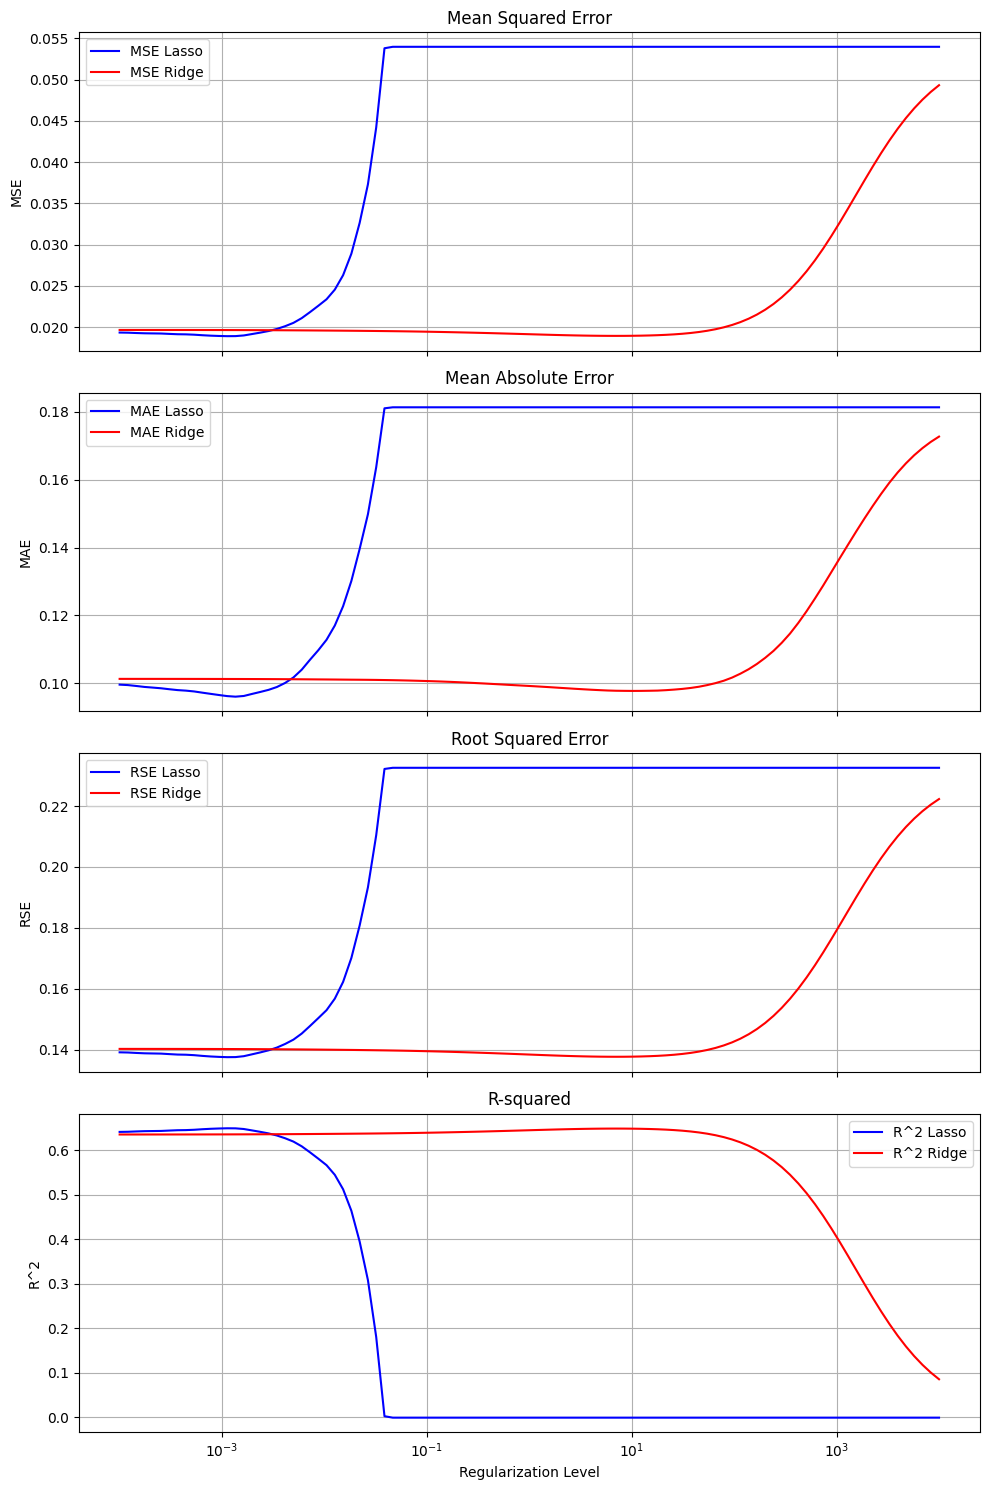

In [94]:
reg_lvls_array = np.array(reg_lvls)

fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plot each score on its own subplot with appropriate y-axis limits
axs[0].plot(reg_lvls_array, scores_mse_lasso, color='blue', label='MSE Lasso')
axs[0].plot(reg_lvls_array, scores_mse_ridge, color='red', label='MSE Ridge')
axs[0].set_title('Mean Squared Error')
axs[0].set_ylabel('MSE')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(reg_lvls_array, scores_mae_lasso, color='blue', label='MAE Lasso')
axs[1].plot(reg_lvls_array, scores_mae_ridge, color='red', label='MAE Ridge')
axs[1].set_title('Mean Absolute Error')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(reg_lvls_array, scores_rse_lasso, color='blue', label='RSE Lasso')
axs[2].plot(reg_lvls_array, scores_rse_ridge, color='red', label='RSE Ridge')
axs[2].set_title('Root Squared Error')
axs[2].set_ylabel('RSE')
axs[2].legend()
axs[2].grid(True)

axs[3].plot(reg_lvls_array, scores_r2_lasso, color='blue', label='R^2 Lasso')
axs[3].plot(reg_lvls_array, scores_r2_ridge, color='red', label='R^2 Ridge')
axs[3].set_title('R-squared')
axs[3].set_ylabel('R^2')
axs[3].legend()
axs[3].grid(True)

# Set the x-axis to a logarithmic scale
for ax in axs:
    ax.set_xscale('log')

# Label the x-axis
axs[-1].set_xlabel('Regularization Level')

# Show the plot
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

There is a visible difference between both methods. As we can see the score when using Lasso becomes worse earlier compared to Ridge. When using Ridge we obtain the best score when using bigger Regularization level. Anyway for both of them the metrics reach their best with increasing the regularization level and then only become worse. The best regularization level for **Lasso** seems to be 0.001, while for **Ridge** it is 7.055.

Now let's construct both best models and compare them.

In [98]:
best_ridge_model = Ridge(alpha=7.055, max_iter=1000)
best_ridge_model.fit(X_train, y_train)

Ridge(alpha=7.055, max_iter=1000)

In [99]:
best_lasso_model = Lasso(alpha=0.001, max_iter=1000)
best_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

Now lets also evaluate both best models on the test set.

In [102]:
from sklearn.metrics import mean_squared_error

# Predict and evaluate Ridge regression
ridge_predictions = best_ridge_model.predict(X_test)
ridge_mse = np.square(np.subtract(y_test, ridge_predictions)).mean()
ridge_mae = np.abs(np.subtract(y_test, ridge_predictions)).mean()
rss = np.square(np.subtract(y_test, ridge_predictions)).sum()
ridge_rse = np.sqrt(rss / (len(y_test) - 2))
tss = np.square(np.subtract(y_test, y_test.mean())).sum()
ridge_r2 = 1 - np.divide(rss, tss)

# Predict and evaluate Lasso regression
lasso_predictions = best_lasso_model.predict(X_test)
lasso_mse = np.square(np.subtract(y_test, lasso_predictions)).mean()
lasso_mae = np.abs(np.subtract(y_test, lasso_predictions)).mean()
rss = np.square(np.subtract(y_test, lasso_predictions)).sum()
lasso_rse = np.sqrt(rss / (len(y_test) - 2))
tss = np.square(np.subtract(y_test, y_test.mean())).sum()
lasso_r2 = 1 - np.divide(rss, tss)

print(f'Ridge Regression Test MSE: {ridge_mse}')
print(f'Lasso Regression Test MSE: {lasso_mse}')
print()
print(f'Ridge Regression Test MAE: {ridge_mae}')
print(f'Ridge Regression Test MAE: {lasso_mae}')
print()
print(f'Ridge Regression Test RSE: {ridge_rse}')
print(f'Ridge Regression Test RSE: {lasso_rse}')
print()
print(f'Ridge Regression Test R2: {ridge_r2}')
print(f'Ridge Regression Test R2: {lasso_r2}')

Ridge Regression Test MSE: 0.01893727215355137
Lasso Regression Test MSE: 0.018916354128449355

Ridge Regression Test MAE: 0.0977226117561336
Ridge Regression Test MAE: 0.09634153296172883

Ridge Regression Test RSE: 0.13775099644721894
Ridge Regression Test RSE: 0.1376748958627465

Ridge Regression Test R2: 0.6488631739652609
Ridge Regression Test R2: 0.6492510381138923


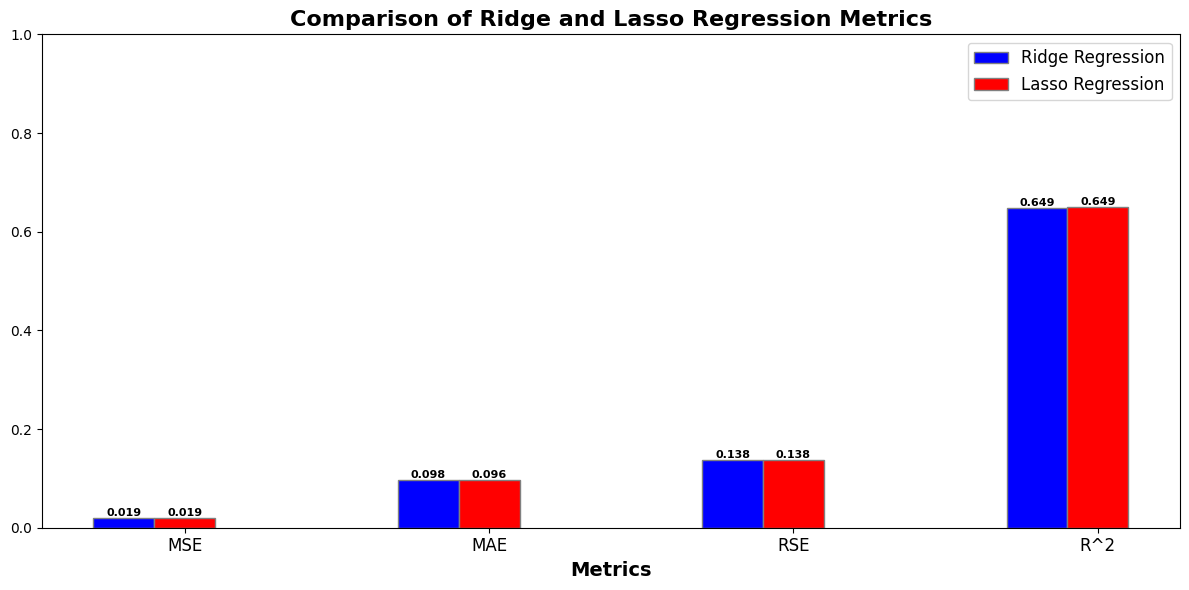

In [103]:
metrics = ['MSE', 'MAE', 'RSE', 'R^2']
ridge_scores = [ridge_mse, ridge_mae, ridge_rse, ridge_r2]
lasso_scores = [lasso_mse, lasso_mae, lasso_rse, lasso_r2]

# Set position of bar on X axis
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the figure
plt.figure(figsize=(12, 6))

# Draw the plot
plt.bar(r1, ridge_scores, color='blue', width=bar_width, edgecolor='grey', label='Ridge Regression')
plt.bar(r2, lasso_scores, color='red', width=bar_width, edgecolor='grey', label='Lasso Regression')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(metrics))], metrics, fontsize=12)

# Adding the scores on top of the bars
for i in range(len(ridge_scores)):
    plt.text(r1[i], ridge_scores[i] + 0.01, f'{ridge_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r2[i], lasso_scores[i] + 0.01, f'{lasso_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')

# Adjust the y-axis limit
plt.ylim(0, 1)

# Add title and legend
plt.title('Comparison of Ridge and Lasso Regression Metrics', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

We can see that eventhough the models use different learning rates they have similar evaluation metric scores for each metric.

## Comparing the selected attributes

We will compare the attributes selected retrieved with foward feature selection and cross validation versus the ones retrieved with lasso.

In [104]:
feature_names = communities_crime.iloc[:, :-1].columns
lasso_coef = best_lasso_model.coef_

lasso_selected_features = [feature for feature, coef in zip(feature_names, lasso_coef) if coef != 0]

print(f"Selected {len(lasso_selected_features)} attributes by Lasso regression:")
print(lasso_selected_features)

Selected 23 attributes by Lasso regression:
['racepctblack', 'racePctWhite', 'pctUrban', 'pctWWage', 'pctWInvInc', 'AsianPerCap', 'PctEmplManu', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctHousNoPhone', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PctSameCity85']


Let's import the attributes extracted by the best forward selection from the previous assignment and compare the results with the extracted attributes with lasso.

In [105]:
forward_selection_features_idxs = [2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 21, 22, 23, 25, 28, 29, 33, 35, 38, 39, 41, 44, 48, 50, 62, 64, 66, 67, 68, 71, 73, 74, 75, 79, 80, 82, 84, 85, 86, 88, 90, 99]
forward_selection_features = list(communities_crime.iloc[:, forward_selection_features_idxs].columns)

print(f"Selected {len(forward_selection_features)} attributes by Forward selection:")
print(forward_selection_features)

Selected 45 attributes by Forward selection:
['racepctblack', 'racePctWhite', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWRetire', 'medFamInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'OtherPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'PctLargHouseFam', 'PersPerOccupHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', 'OwnOccMedVal', 'RentLowQ', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'LemasPctOfficDrugUn']


We can see that with forward selection we have extracted 2 times more attributes. Let's compare the scores from both lasso and linear regression with these selected attributes.

In [106]:
from sklearn.linear_model import LinearRegression

In [108]:
best_linear_model = LinearRegression().fit(X_train[:, forward_selection_features_idxs], y_train)
linear_predictions = best_linear_model.predict(X_test[:, forward_selection_features_idxs])

linear_mse = np.square(np.subtract(y_test, linear_predictions)).mean()
linear_mae = np.abs(np.subtract(y_test, linear_predictions)).mean()
rss = np.square(np.subtract(y_test, linear_predictions)).sum()
linear_rse = np.sqrt(rss / (len(y_test) - 2))
tss = np.square(np.subtract(y_test, y_test.mean())).sum()
linear_r2 = 1 - np.divide(rss, tss)

Let's first see, which are the attributes that are available in both models and compare their coefficients

In [109]:
data = [{"Feature": feature, "Lasso coeff": coef, "Linear coeff": best_linear_model.coef_[forward_selection_features.index(feature)]} for feature, coef in zip(feature_names, lasso_coef) if feature in forward_selection_features]
df = pd.DataFrame(data)

In [110]:
df_lasso = df[(df == 0).any(axis=1)]
len(df_lasso), df_lasso

(30,
                 Feature  Lasso coeff  Linear coeff
 2           agePct12t29         -0.0     -0.302048
 3           agePct16t24         -0.0      0.009206
 4            agePct65up          0.0      0.131526
 5             numbUrban          0.0     -0.270684
 7             medIncome         -0.0     -0.158637
 9          pctWFarmSelf          0.0      0.035483
 11           pctWRetire         -0.0     -0.120681
 12            medFamInc         -0.0      0.346672
 13          whitePerCap         -0.0     -0.224351
 14          blackPerCap         -0.0     -0.048688
 15         indianPerCap         -0.0     -0.035345
 16          OtherPerCap          0.0      0.031516
 17       PctPopUnderPov          0.0     -0.118619
 18      PctLess9thGrade          0.0     -0.065017
 19            PctEmploy         -0.0      0.166700
 20      PctEmplProfServ         -0.0      0.030070
 22       MalePctNevMarr          0.0      0.218656
 23          TotalPctDiv          0.0     -0.319641
 27    

These are the 30 attributes from the forward selection, which were not extracted with lasso. As we can see some of them had pretty big coefficients such as **PctPersOwnOccup**, **PctHousOwnOccup**, etc.

In [111]:
df_both = df[(df != 0).all(axis=1)]
len(df_both), df_both

(15,
                   Feature  Lasso coeff  Linear coeff
 0            racepctblack     0.127238      0.174640
 1            racePctWhite    -0.081075     -0.093441
 6                pctUrban     0.041062      0.056736
 8                pctWWage    -0.019159     -0.141096
 10             pctWInvInc    -0.115543     -0.310458
 21         MalePctDivorce     0.125157      0.377920
 24            PctKids2Par    -0.107754     -0.271507
 25             PctWorkMom    -0.030585     -0.135671
 26               PctIlleg     0.192771      0.092640
 31       PctPersDenseHous     0.029308      0.177949
 32             HousVacant     0.083237      0.281274
 34       PctVacantBoarded     0.073459      0.093908
 41      MedRentPctHousInc     0.015698      0.042553
 42  MedOwnCostPctIncNoMtg    -0.050739     -0.130159
 43              NumStreet     0.139187      0.267357)

For the 15 attributes that were extracted from both methods, we can see that there is bigger difference in some of the coefficients such as **pctWWage**, **MalePctDivorce**, **PctIlleg**, **NumStreet**, etc., but most of them are closer to each other and all of them have the same sign in both models. While for the ones that were not chosen with lasso we can see that most of them have small value, but some have also pretty big, such as **MedRent**, **PctPersOwnOccup**, **PctHousOwnOcc**, etc. Let's see how this changes the evaluation scores.

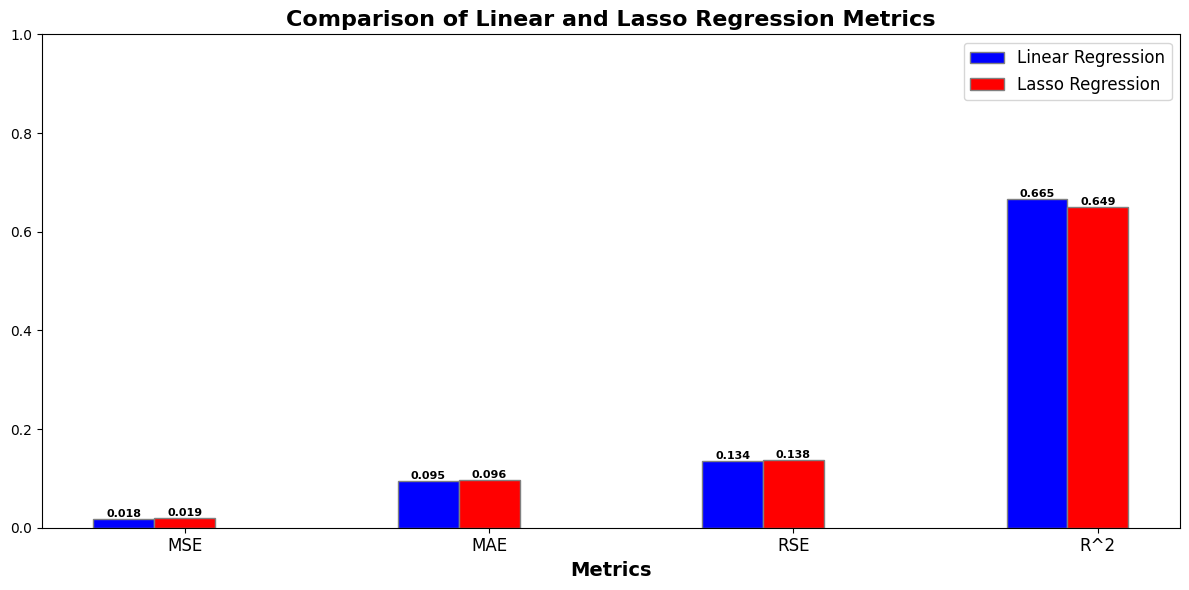

In [112]:
metrics = ['MSE', 'MAE', 'RSE', 'R^2']
linear_scores = [linear_mse, linear_mae, linear_rse, linear_r2]
lasso_scores = [lasso_mse, lasso_mae, lasso_rse, lasso_r2]

# Set position of bar on X axis
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the figure
plt.figure(figsize=(12, 6))

# Draw the plot
plt.bar(r1, linear_scores, color='blue', width=bar_width, edgecolor='grey', label='Linear Regression')
plt.bar(r2, lasso_scores, color='red', width=bar_width, edgecolor='grey', label='Lasso Regression')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(metrics))], metrics, fontsize=12)

# Adding the scores on top of the bars
for i in range(len(linear_scores)):
    plt.text(r1[i], linear_scores[i] + 0.01, f'{linear_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r2[i], lasso_scores[i] + 0.01, f'{lasso_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')

# Adjust the y-axis limit
plt.ylim(0, 1)

# Add title and legend
plt.title('Comparison of Linear and Lasso Regression Metrics', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

From the plot it becomes clear that Lasso scores are very slightly lower than the Linear regression scores, but the difference is very small. This means that we can get pretty much the same scores with two times less attributes.

## Download the "Wine quality" dataset and preprocess the data

We will choose only the white wine data and prepare the data for modelling. We will be doing regression of the **wine quality grades**, which is the last column.

In [113]:
import pandas as pd

In [114]:
wine_quality_white = pd.read_csv('data/winequality-white.csv', delimiter=';')
wine_quality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Since there is no missing data the only thing left to prepare the data for modeling is to split it.

In [115]:
X = wine_quality_white.iloc[:, :-1].values
y = wine_quality_white.iloc[:, -1].values

In [116]:
X

array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
       [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
       [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [117]:
y

array([6, 6, 6, ..., 6, 7, 6])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Implementing ridge regression

We will implement ridge regression with gradient descent and stochastic gradient descent from scratch.

Let's first start with the ridge regression with GD.

In [145]:
class RidgeRegressionGD:
  def __init__(self, learning_rate=0.01, n_iterations=1000, reg_lvl=0, tolerance=1e-6):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.reg_lvl = reg_lvl
    self.tolerance = tolerance
    self.coefficients = None
    self.means = None
    self.stds = None


  def fit(self, X, y):
    # Standardize the data
    self.means = np.mean(X, axis=0)
    self.stds = np.std(X, axis=0)
    X = np.divide(np.subtract(X, self.means), self.stds)

    rows, cols = X.shape
    self.coefficients = np.zeros(cols + 1)
    X_mat = np.ones((rows, cols + 1))
    X_mat[:, 1:] = X
    last_cost = None

    for index in range(self.n_iterations):
      y_pred = X_mat.dot(self.coefficients)
      residuals = y - y_pred
      gradients = (-2 * X_mat.T.dot(residuals) + 2 * self.reg_lvl * np.hstack((0, self.coefficients[1:]))) / rows
      self.coefficients -= self.learning_rate * gradients

      y_pred = X_mat.dot(self.coefficients)
      curr_cost = np.square(np.subtract(y, y_pred)).sum()

      if last_cost is not None and abs(last_cost - curr_cost) < self.tolerance:
        print(f"Convergence at step {index + 1}: {abs(last_cost - curr_cost)}")
        break

      last_cost = curr_cost

  def predict(self, X):
    # Check if the model is already trained (coefficients are calculated)
    if self.coefficients is None:
      raise ValueError("Model has not been trained yet. Call the function 'fit()' first.")

    # Transform the features into a matrix
    X = np.divide(np.subtract(X, self.means), self.stds)
    rows, cols = X.shape
    X_mat = np.ones((rows, cols + 1))
    X_mat[:, 1:] = X

    # Calculate the predictions
    return X_mat.dot(self.coefficients)


  def evaluate(self, y_true, y_pred):
    # Calculate the MSE
    mse = np.square(np.subtract(y_true, y_pred)).mean()
    # Calculate the MAE
    mae = np.abs(np.subtract(y_true, y_pred)).mean()
    # Calculate the RSE
    rss = np.square(np.subtract(y_true, y_pred)).sum()
    rse = np.sqrt(rss / (len(y_true) - 2))
    # Calculate the R^2
    tss = np.square(np.subtract(y_true, y_true.mean())).sum()
    r2_score = 1 - np.divide(rss, tss)

    return mse, mae, rse, r2_score

Now let's do the same with SGD.

In [180]:
class RidgeRegressionSGD:
  def __init__(self, learning_rate=0.01, n_epochs=50, reg_lvl=0, tolerance=1e-6):
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.reg_lvl = reg_lvl
    self.tolerance = tolerance
    self.coefficients = None
    self.means = None
    self.stds = None


  def fit(self, X, y):
    # Standardize the data
    self.means = np.mean(X, axis=0)
    self.stds = np.std(X, axis=0)
    X = np.divide(np.subtract(X, self.means), self.stds)

    rows, cols = X.shape
    self.coefficients = np.zeros(cols + 1)
    X_mat = np.ones((rows, cols + 1))
    X_mat[:, 1:] = X
    last_cost = None
    convergence = False

    for epoch in range(self.n_epochs):
      # Shuffle the dataset
      np.random.seed(epoch)
      indices = np.arange(rows)
      np.random.shuffle(indices)

      for index in indices:
        # Extract sample
        X_random = X_mat[index:index+1]
        y_random = y[index:index+1]

        # Calculate the gradients
        y_pred = X_random.dot(self.coefficients)
        residuals = y_random - y_pred
        gradients = -2 * X_random.T.dot(residuals) + 2 * self.reg_lvl * np.hstack((0, self.coefficients[1:]))
        self.coefficients -= self.learning_rate * gradients

        y_pred = X_random.dot(self.coefficients)
        curr_cost = np.square(np.subtract(y_random, y_pred)).sum()

        if last_cost != None and abs(last_cost - curr_cost) < self.tolerance:
          print(f"Convergence at epoch {epoch + 1} and sample {index + 1}: {abs(last_cost - curr_cost)}")
          convergence = True
          break

        last_cost = curr_cost

      if convergence:
        break


  def predict(self, X):
    # Check if the model is already trained (coefficients are calculated)
    if self.coefficients is None:
      raise ValueError("Model has not been trained yet. Call the function 'fit()' first.")

    # Transform the features into a matrix
    X = np.divide(np.subtract(X, self.means), self.stds)
    rows, cols = X.shape
    X_mat = np.ones((rows, cols + 1))
    X_mat[:, 1:] = X

    # Calculate the predictions
    return X_mat.dot(self.coefficients)


  def evaluate(self, y_true, y_pred):
    # Calculate the MSE
    mse = np.square(np.subtract(y_true, y_pred)).mean()
    # Calculate the MAE
    mae = np.abs(np.subtract(y_true, y_pred)).mean()
    # Calculate the RSE
    rss = np.square(np.subtract(y_true, y_pred)).sum()
    rse = np.sqrt(rss / (len(y_true) - 2))
    # Calculate the R^2
    tss = np.square(np.subtract(y_true, y_true.mean())).sum()
    r2_score = 1 - np.divide(rss, tss)

    return mse, mae, rse, r2_score

## Testing the ridge regression

We will test the implementations on the "Wine quality" data and we will test different learning rates and try to find the optimal one. We will also compare the time to convergence and the results of the two gradient descents we have implemented.

First let's look at the GD ridge regression.

We already found out that the

In [182]:
learning_rates = [0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
reg_lvls = [0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

In [183]:
# Define the best score that we want to maximize or minimize
best_score_mse, best_score_mae, best_score_rse, best_score_r2  = None, None, None, None
best_params_mse, best_params_mae, best_params_rse, best_params_r2  = {}, {}, {}, {}
scores_mse, scores_mae, scores_rse, scores_r2  = [], [], [], []

for lr in tqdm(learning_rates, desc='Learning Rates'):
  for reg in reg_lvls:
    # Initialize the RidgeRegressionGD with current set of hyperparameters
    model = RidgeRegressionGD(learning_rate=lr, n_iterations=1000, reg_lvl=reg)

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model using MSE
    mse, mae, rse, r2 = model.evaluate(y_test, y_pred)

    scores_mse.append(mse)
    scores_mae.append(mae)
    scores_rse.append(rse)
    scores_r2.append(r2)

    # If the score is better, update the best score and parameters
    if best_score_mse is None or mse < best_score_mse:
        best_score_mse = mse
        best_params_mse = {'learning_rate': lr, 'reg_lvl': reg}
    if best_score_mae is None or mae < best_score_mae:
        best_score_mae = mae
        best_params_mae = {'learning_rate': lr, 'reg_lvl': reg}
    if best_score_rse is None or rse < best_score_rse:
        best_score_rse = rse
        best_params_rse = {'learning_rate': lr, 'reg_lvl': reg}
    if best_score_r2 is None or r2 > best_score_r2:
        best_score_r2 = r2
        best_params_r2 = {'learning_rate': lr, 'reg_lvl': reg}


# After the grid search
print()
print(f"Best Parameters (MSE): {best_params_mse}")
print(f"Best Score (MSE): {best_score_mse}")
print(f"Best Parameters (MAE): {best_params_mae}")
print(f"Best Score (MAE): {best_score_mae}")
print(f"Best Parameters (RSE): {best_params_rse}")
print(f"Best Score (RSE): {best_score_rse}")
print(f"Best Parameters (R2): {best_params_r2}")
print(f"Best Score (R2): {best_score_r2}")

Learning Rates:  70%|███████   | 7/10 [00:10<00:03,  1.13s/it]

Convergence at step 403: 9.759419299371075e-07
Convergence at step 403: 9.907321327773388e-07
Convergence at step 404: 9.828904694586527e-07
Convergence at step 405: 9.824411790759768e-07
Convergence at step 410: 9.799218787520658e-07


Learning Rates:  80%|████████  | 8/10 [00:10<00:01,  1.09it/s]

Convergence at step 417: 9.86525719781639e-07
Convergence at step 426: 9.940495147020556e-07
Convergence at step 464: 9.959571798390243e-07
Convergence at step 500: 9.851316917774966e-07
Convergence at step 527: 9.908094398269895e-07


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-145-58d87aa94ea4>:33: RuntimeWarning: invalid value encountered in double_scalars
  if last_cost is not None and abs(last_cost - curr_cost) < self.tolerance:
<ipython-input-145-58d87aa94ea4>:31: RuntimeWarning: overflow encountered in square
  curr_cost = np.square(np.subtract(y, y_pred)).sum()
<ipython-input-145-58d87aa94ea4>:27: RuntimeWarning: overflow encountered in multiply
  gradients = (-2 * X_mat.T.dot(residuals) + 2 * self.reg_lvl * np.hstack((0, self.coefficients[1:]))) / rows
Learning Rates: 100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


Best Parameters (MSE): {'learning_rate': 0.3, 'reg_lvl': 0.001}
Best Score (MSE): 0.5677137621024503
Best Parameters (MAE): {'learning_rate': 0.3, 'reg_lvl': 0.001}
Best Score (MAE): 0.5862351460636402
Best Parameters (RSE): {'learning_rate': 0.3, 'reg_lvl': 0.001}
Best Score (RSE): 0.7537756762335088
Best Parameters (R2): {'learning_rate': 0.3, 'reg_lvl': 0.001}
Best Score (R2): 0.2631400816777041


In [184]:
import seaborn as sns

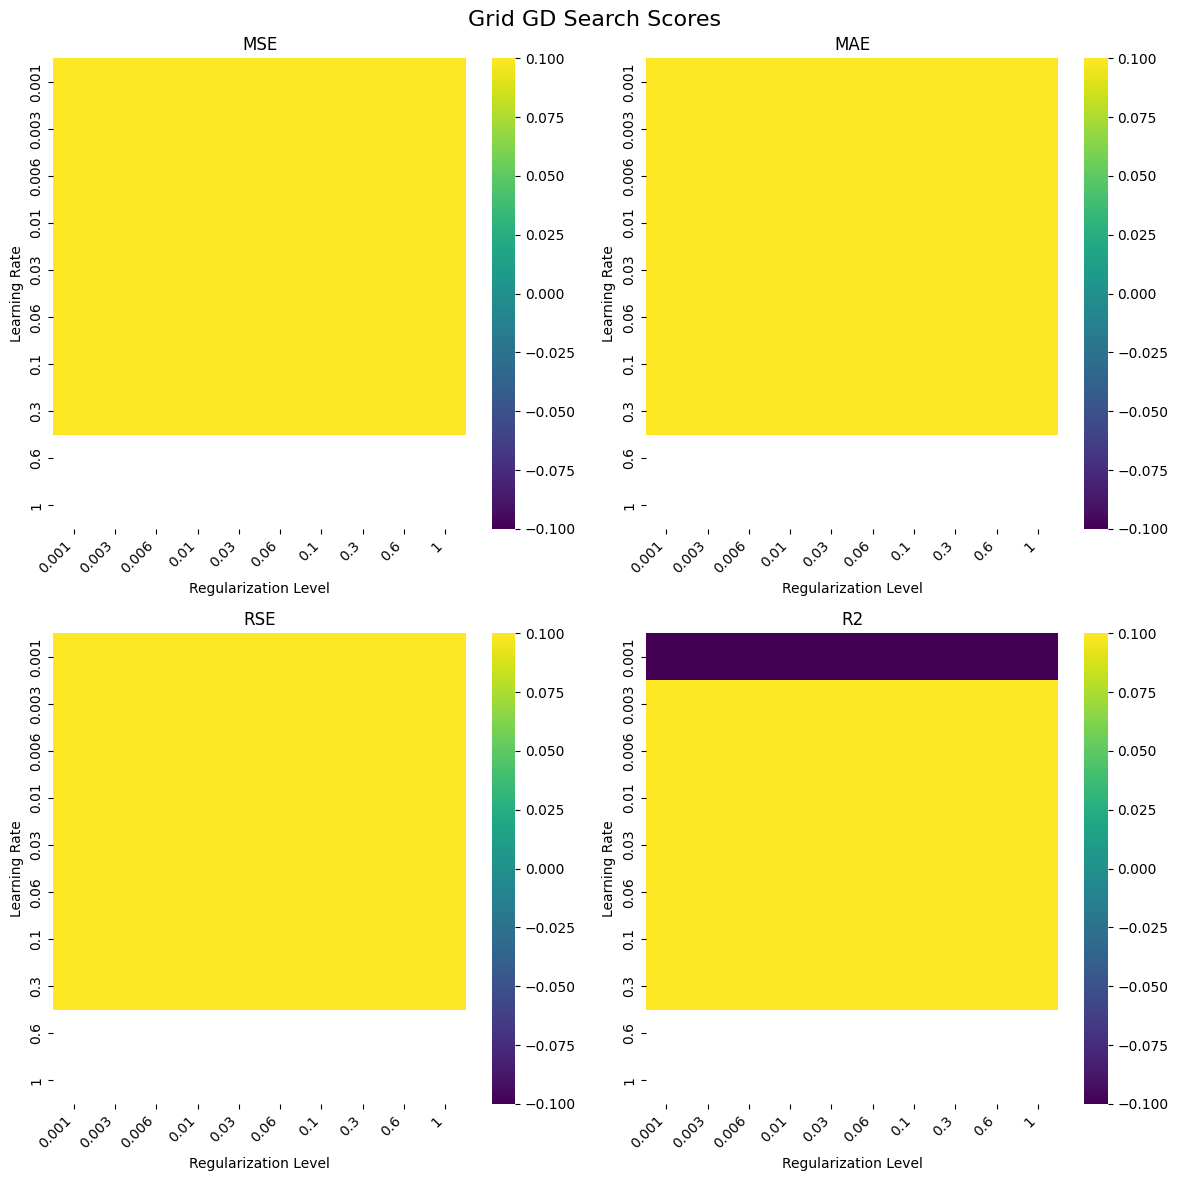

In [186]:
# Reshape scores to a matrix form
scores_mse_matrix = np.array(scores_mse).reshape(len(learning_rates), len(reg_lvls))
scores_mae_matrix = np.array(scores_mae).reshape(len(learning_rates), len(reg_lvls))
scores_rse_matrix = np.array(scores_rse).reshape(len(learning_rates), len(reg_lvls))
scores_r2_matrix = np.array(scores_r2).reshape(len(learning_rates), len(reg_lvls))

scores_matrices = [scores_mse_matrix, scores_mae_matrix, scores_rse_matrix, scores_r2_matrix]
score_titles = ['MSE', 'MAE', 'RSE', 'R2']
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Grid GD Search Scores', fontsize=16)

# Iterate over your axes and set the properties
for i, ax in enumerate(axes.flatten()):
    vmin = np.percentile(scores_matrices[i], 5)
    vmax = np.percentile(scores_matrices[i], 95)
    sns.heatmap(scores_matrices[i], ax=ax, annot=False, cmap='viridis', vmin=vmin, vmax=vmax, yticklabels=learning_rates)
    ax.set_title(score_titles[i])
    ax.set_xlabel('Regularization Level')
    ax.set_ylabel('Learning Rate')
    ax.set_xticklabels(reg_lvls, rotation=45, ha='right')

plt.tight_layout()
plt.show()

As we can see for learning rate bigger than 0.6 the GD doesn't work right. We can see that for MSE, MAE, and RSE all learning rates return pretty much similar results for all regularization levels, while for the R2 the learning rate of 0.001 gives pretty bad results for each regularization level. Anyway, the best results seem to be for **learning rate** 0.3 and **regularization level** 0.001. Now let's train a model for these values and see what coefficients and scores we get.

In [187]:
regression_gd = RidgeRegressionGD(learning_rate=0.3, n_iterations=1000, reg_lvl=0.001)
regression_gd.fit(X_train, y_train)

Convergence at step 403: 9.759419299371075e-07


In [188]:
y_pred_gd = regression_gd.predict(X_test)
y_pred_gd

array([6.35740375, 6.43361734, 6.39531587, ..., 6.70686157, 6.15042026,
       6.72752606])

In [189]:
y_test

array([7, 8, 8, ..., 7, 6, 7])

In [190]:
mse_gd, mae_gd, rse_gd, r2_gd = regression_gd.evaluate(y_test, y_pred_gd)

print("Linear Regression Evaluation Results:")
print("Mean Squared Error (MSE): ", mse_gd)
print("Mean Absolute Error (MAE): ", mae_gd)
print("Residual Standard Error (RSE): ", rse_gd)
print("R-Squared Score (R^2): ", r2_gd)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  0.5677137621024503
Mean Absolute Error (MAE):  0.5862351460636402
Residual Standard Error (RSE):  0.7537756762335088
R-Squared Score (R^2):  0.2631400816777041


As we can see these are the results that we get for all 4 evaluation metrics. In this case we have convergence at step 403, since we are using the default tolerance. Let's see how the results will change for different tolerances.

In [191]:
tolerances = [0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

for tol in tolerances:
  print(f"Linear Regression Evaluation Results for tolerance {tol}:")
  # Initialize the RidgeRegressionGD with current set of hyperparameters
  model = RidgeRegressionGD(learning_rate=0.3, n_iterations=1000, reg_lvl=0.001, tolerance=tol)

  # Fit the model on training data
  model.fit(X_train, y_train)

  # Predict on test data
  y_pred = model.predict(X_test)

  # Evaluate the model using MSE
  mse, mae, rse, r2 = model.evaluate(y_test, y_pred)

  print(f"Coefficients: {model.coefficients}:")
  print("Mean Squared Error (MSE): ", mse)
  print("Mean Absolute Error (MAE): ", mae)
  print("Residual Standard Error (RSE): ", rse)
  print("R-Squared Score (R^2): ", r2)
  print()

Linear Regression Evaluation Results for tolerance 0:
Coefficients: [ 5.85095958e+00  2.46123142e-02 -1.87401658e-01 -5.37056786e-03
  3.39603728e-01  5.66019242e-05  8.08059372e-02 -1.22635683e-02
 -3.48770485e-01  9.66288724e-02  9.35895414e-02  2.98529893e-01]:
Mean Squared Error (MSE):  0.5677050014813234
Mean Absolute Error (MAE):  0.5862311840832916
Residual Standard Error (RSE):  0.7537698603021095
R-Squared Score (R^2):  0.26315145246171334

Linear Regression Evaluation Results for tolerance 0.1:
Convergence at step 52: 0.09831284378833516
Coefficients: [ 5.85095958e+00 -1.27948826e-03 -1.91144470e-01 -6.02942532e-03
  2.63710901e-01 -2.44258279e-03  8.86132778e-02 -1.40302513e-02
 -2.26987242e-01  7.27921479e-02  8.70955421e-02  3.48762450e-01]:
Mean Squared Error (MSE):  0.5699381775373634
Mean Absolute Error (MAE):  0.587298923465002
Residual Standard Error (RSE):  0.7552509540488819
R-Squared Score (R^2):  0.26025291796052574

Linear Regression Evaluation Results for tolera

We can see that using all the 1000 iterations gives us the very similar results as for example using the tolerance **0.0001**, which converges on step 253 or the tolerance **0.001**, which converges on step 178. We will choose to use the tolerance 0.001 since it converges fast and gives us pretty similar results to the one we get after going thru all the iterations.

Now let's go thru the same steps for the SGD ridge regression.

In [192]:
# Define the best score that we want to maximize or minimize
best_score_mse, best_score_mae, best_score_rse, best_score_r2  = None, None, None, None
best_params_mse, best_params_mae, best_params_rse, best_params_r2  = {}, {}, {}, {}
scores_mse, scores_mae, scores_rse, scores_r2  = [], [], [], []

for lr in tqdm(learning_rates, desc='Learning Rates'):
  for reg in reg_lvls:
    # Initialize the RidgeRegressionGD with current set of hyperparameters
    model = RidgeRegressionSGD(learning_rate=lr, n_epochs=50, reg_lvl=reg)

    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model using MSE
    mse, mae, rse, r2 = model.evaluate(y_test, y_pred)

    scores_mse.append(mse)
    scores_mae.append(mae)
    scores_rse.append(rse)
    scores_r2.append(r2)

    # If the score is better, update the best score and parameters
    if best_score_mse is None or mse < best_score_mse:
        best_score_mse = mse
        best_params_mse = {'learning_rate': lr, 'reg_lvl': reg}
    if best_score_mae is None or mae < best_score_mae:
        best_score_mae = mae
        best_params_mae = {'learning_rate': lr, 'reg_lvl': reg}
    if best_score_rse is None or rse < best_score_rse:
        best_score_rse = rse
        best_params_rse = {'learning_rate': lr, 'reg_lvl': reg}
    if best_score_r2 is None or r2 > best_score_r2:
        best_score_r2 = r2
        best_params_r2 = {'learning_rate': lr, 'reg_lvl': reg}


# After the grid search
print()
print(f"Best Parameters (MSE): {best_params_mse}")
print(f"Best Score (MSE): {best_score_mse}")
print(f"Best Parameters (MAE): {best_params_mae}")
print(f"Best Score (MAE): {best_score_mae}")
print(f"Best Parameters (RSE): {best_params_rse}")
print(f"Best Score (RSE): {best_score_rse}")
print(f"Best Parameters (R2): {best_params_r2}")
print(f"Best Score (R2): {best_score_r2}")

Learning Rates:   0%|          | 0/10 [00:00<?, ?it/s]

Convergence at epoch 4 and sample 496: 9.479044411344836e-07
Convergence at epoch 10 and sample 82: 3.816541128994217e-09
Convergence at epoch 3 and sample 91: 2.598840895084824e-07
Convergence at epoch 43 and sample 1581: 4.6831971717717016e-07


Learning Rates:  10%|█         | 1/10 [00:27<04:04, 27.16s/it]

Convergence at epoch 15 and sample 2107: 4.5135456268139286e-07
Convergence at epoch 14 and sample 392: 2.6102037833236613e-07
Convergence at epoch 17 and sample 35: 2.1847793529364325e-07
Convergence at epoch 44 and sample 1675: 8.142963465579822e-07
Convergence at epoch 28 and sample 1881: 1.2375741044387816e-07
Convergence at epoch 9 and sample 1178: 3.575942908451424e-07
Convergence at epoch 38 and sample 644: 1.0055007976239594e-07
Convergence at epoch 16 and sample 534: 3.565800053562107e-07


Learning Rates:  20%|██        | 2/10 [00:46<03:02, 22.78s/it]

Convergence at epoch 18 and sample 2150: 3.577941385321526e-07
Convergence at epoch 4 and sample 1611: 2.1850833464842623e-07
Convergence at epoch 11 and sample 938: 5.640170451421606e-08
Convergence at epoch 8 and sample 439: 5.343271009659476e-07
Convergence at epoch 6 and sample 1909: 9.085396719052397e-07
Convergence at epoch 10 and sample 1024: 4.497240148547115e-08
Convergence at epoch 15 and sample 2045: 3.385495720989966e-07
Convergence at epoch 50 and sample 207: 7.891955315733092e-07


Learning Rates:  30%|███       | 3/10 [01:01<02:12, 18.88s/it]

Convergence at epoch 15 and sample 331: 5.926147233397197e-07
Convergence at epoch 13 and sample 1818: 3.7955314464697986e-07
Convergence at epoch 27 and sample 380: 6.495482493693022e-07
Convergence at epoch 16 and sample 990: 1.2753350129515977e-07
Convergence at epoch 13 and sample 288: 7.931781281014118e-07
Convergence at epoch 4 and sample 192: 2.4361427470090662e-08
Convergence at epoch 7 and sample 1518: 5.713049769603112e-07


Learning Rates:  40%|████      | 4/10 [01:18<01:49, 18.33s/it]

Convergence at epoch 23 and sample 1397: 5.239895564277883e-07
Convergence at epoch 1 and sample 180: 1.586055913921857e-07
Convergence at epoch 4 and sample 845: 3.9881085227268053e-07
Convergence at epoch 8 and sample 1888: 2.9806753251259566e-08
Convergence at epoch 2 and sample 2343: 3.3449456782208044e-07
Convergence at epoch 15 and sample 70: 3.586566323334259e-07
Convergence at epoch 2 and sample 1838: 8.573172077063963e-07
Convergence at epoch 1 and sample 1184: 1.2315625915944626e-07


Learning Rates:  50%|█████     | 5/10 [01:21<01:03, 12.64s/it]

Convergence at epoch 8 and sample 394: 1.9142500538661924e-07
Convergence at epoch 1 and sample 1915: 3.1737343821839487e-07
Convergence at epoch 2 and sample 1398: 9.655129771684082e-07
Convergence at epoch 4 and sample 1146: 7.085935605507026e-07
Convergence at epoch 4 and sample 1146: 1.4162084940821258e-08
Convergence at epoch 2 and sample 748: 4.3654222956463174e-07
Convergence at epoch 4 and sample 1332: 3.128066223087898e-07
Convergence at epoch 18 and sample 2403: 3.89596538993277e-07
Convergence at epoch 5 and sample 287: 5.446731085542378e-07
Convergence at epoch 5 and sample 1138: 8.372223393244469e-07
Convergence at epoch 1 and sample 1985: 8.190978029003204e-08
Convergence at epoch 16 and sample 620: 6.587179301193857e-07


Learning Rates:  60%|██████    | 6/10 [01:24<00:38,  9.63s/it]

Convergence at epoch 4 and sample 1839: 4.067382108421686e-07


<ipython-input-180-40192569a152>:43: RuntimeWarning: overflow encountered in square
  curr_cost = np.square(np.subtract(y_random, y_pred)).sum()
<ipython-input-180-40192569a152>:45: RuntimeWarning: invalid value encountered in double_scalars
  if last_cost != None and abs(last_cost - curr_cost) < self.tolerance:
<ipython-input-180-40192569a152>:40: RuntimeWarning: invalid value encountered in subtract
  self.coefficients -= self.learning_rate * gradients
<ipython-input-180-40192569a152>:39: RuntimeWarning: overflow encountered in multiply
  gradients = -2 * X_random.T.dot(residuals) + 2 * self.reg_lvl * np.hstack((0, self.coefficients[1:]))
Learning Rates:  80%|████████  | 8/10 [02:32<00:45, 22.57s/it]<ipython-input-180-40192569a152>:39: RuntimeWarning: overflow encountered in add
  gradients = -2 * X_random.T.dot(residuals) + 2 * self.reg_lvl * np.hstack((0, self.coefficients[1:]))
Learning Rates:  90%|█████████ | 9/10 [03:04<00:25, 25.68s/it]<ipython-input-180-40192569a152>:40: Runti


Best Parameters (MSE): {'learning_rate': 0.001, 'reg_lvl': 0.01}
Best Score (MSE): 0.5681685326074587
Best Parameters (MAE): {'learning_rate': 0.001, 'reg_lvl': 0.001}
Best Score (MAE): 0.5860287828898174
Best Parameters (RSE): {'learning_rate': 0.001, 'reg_lvl': 0.01}
Best Score (RSE): 0.7540775240535014
Best Parameters (R2): {'learning_rate': 0.001, 'reg_lvl': 0.01}
Best Score (R2): 0.26254981563247937


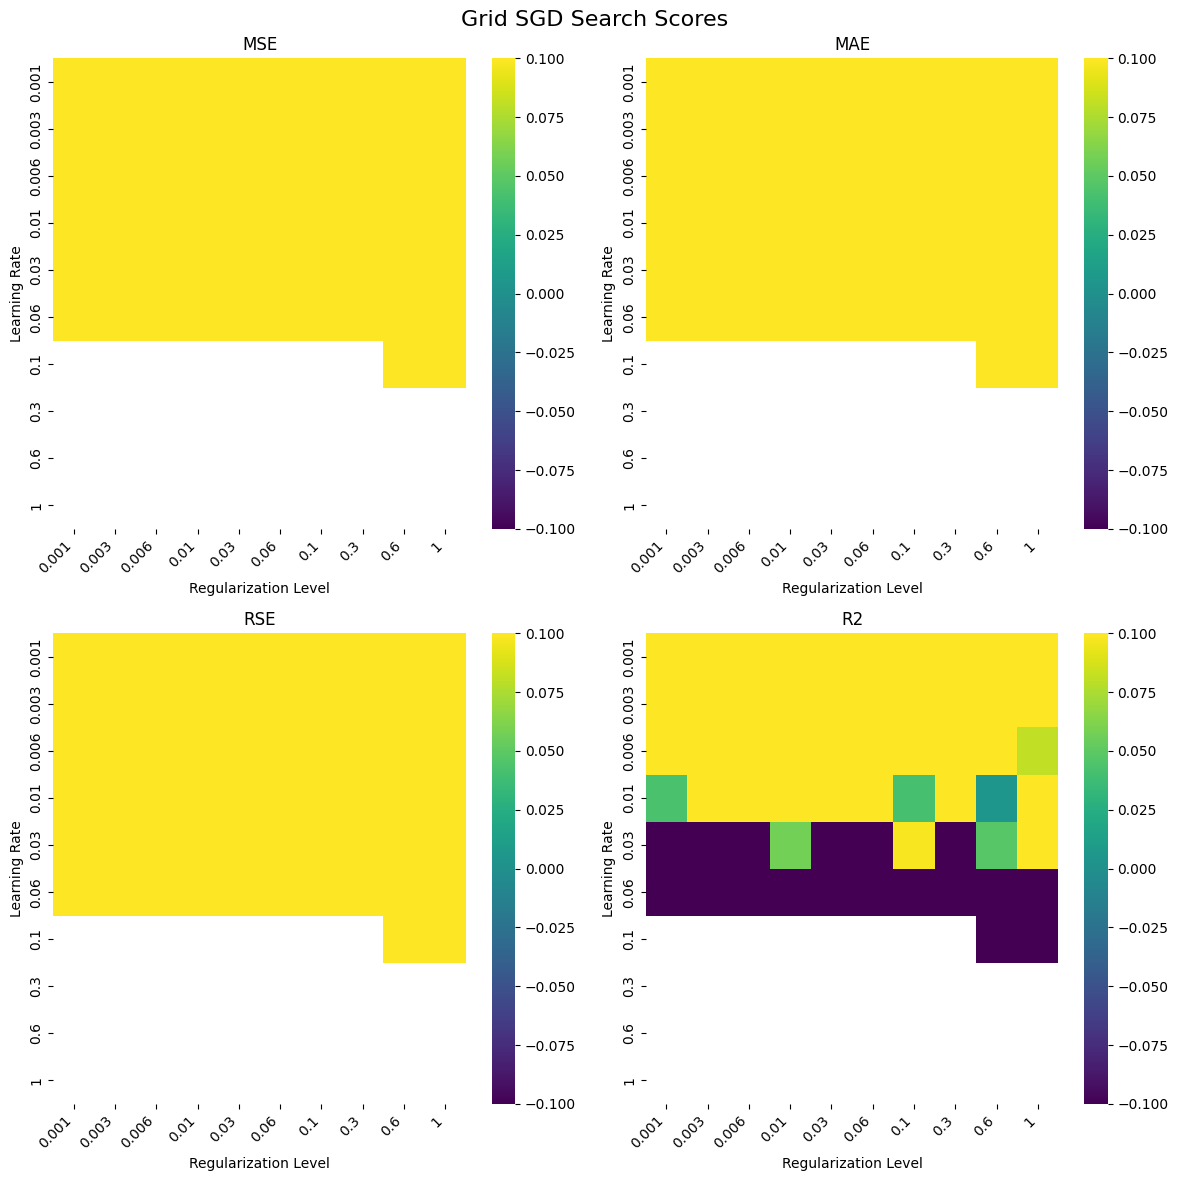

In [199]:
# Reshape scores to a matrix form
scores_mse_matrix = np.array(scores_mse).reshape(len(learning_rates), len(reg_lvls))
scores_mae_matrix = np.array(scores_mae).reshape(len(learning_rates), len(reg_lvls))
scores_rse_matrix = np.array(scores_rse).reshape(len(learning_rates), len(reg_lvls))
scores_r2_matrix = np.array(scores_r2).reshape(len(learning_rates), len(reg_lvls))

scores_matrices = [scores_mse_matrix, scores_mae_matrix, scores_rse_matrix, scores_r2_matrix]
score_titles = ['MSE', 'MAE', 'RSE', 'R2']
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Grid SGD Search Scores', fontsize=16)

# Iterate over your axes and set the properties
for i, ax in enumerate(axes.flatten()):
    vmin = np.percentile(scores_matrices[i], 5)
    vmax = np.percentile(scores_matrices[i], 95)
    sns.heatmap(scores_matrices[i], ax=ax, annot=False, cmap='viridis', vmin=vmin, vmax=vmax, yticklabels=learning_rates)
    ax.set_title(score_titles[i])
    ax.set_xlabel('Regularization Level')
    ax.set_ylabel('Learning Rate')
    ax.set_xticklabels(reg_lvls, rotation=45, ha='right')

plt.tight_layout()
plt.show()

Also here we can see that the MSE, MAE and RSE have similar values, while the R2 seem to have also some worse values and again pretty bad for learning rate 0.03 forward. We can also see that the SGD has more unresolved scores for learning rates bigger that 0.1. Anyway, te best results seem to be for **learning rate** 0.001 and **regularization level** 0.01. Now let's train a model for these values and see what coefficients and scores we get.

In [201]:
regression_sgd = RidgeRegressionSGD(learning_rate=0.001, n_epochs=50, reg_lvl=0.01)
regression_sgd.fit(X_train, y_train)

Convergence at epoch 4 and sample 496: 9.479044411344836e-07


In [202]:
y_pred_sgd = regression_sgd.predict(X_test)
y_pred_sgd

array([6.33841393, 6.38711315, 6.36707093, ..., 6.63563389, 6.14074414,
       6.63928008])

In [203]:
y_test

array([7, 8, 8, ..., 7, 6, 7])

In [204]:
mse_sgd, mae_sgd, rse_sgd, r2_sgd = regression_sgd.evaluate(y_test, y_pred_sgd)
print("Linear Regression Evaluation Results:")
print("Mean Squared Error (MSE): ", mse_sgd)
print("Mean Absolute Error (MAE): ", mae_sgd)
print("Residual Standard Error (RSE): ", rse_sgd)
print("R-Squared Score (R^2): ", r2_sgd)

Linear Regression Evaluation Results:
Mean Squared Error (MSE):  0.5681685326074587
Mean Absolute Error (MAE):  0.588295014326149
Residual Standard Error (RSE):  0.7540775240535014
R-Squared Score (R^2):  0.26254981563247937


As we can see these are the results that we get for all 4 evaluation metrics. In this case we have convergence at epoch 1 step 1276, since we are using the default tolerance. Let's see how the results will change for different tolerances.

In [205]:
tolerances = [0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

for tol in tolerances:
  print(f"Linear Regression Evaluation Results for tolerance {tol}:")

  # Initialize the RidgeRegressionGD with current set of hyperparameters
  model = RidgeRegressionSGD(learning_rate=0.001, n_epochs=50, reg_lvl=0.01, tolerance=tol)

  # Fit the model on training data
  model.fit(X_train, y_train)

  # Predict on test data
  y_pred = model.predict(X_test)

  # Evaluate the model using MSE
  mse, mae, rse, r2 = model.evaluate(y_test, y_pred)

  print(f"Coefficients: {model.coefficients}:")
  print("Mean Squared Error (MSE): ", mse)
  print("Mean Absolute Error (MAE): ", mae)
  print("Residual Standard Error (RSE): ", rse)
  print("R-Squared Score (R^2): ", r2)
  print()

Linear Regression Evaluation Results for tolerance 0:
Coefficients: [ 5.84762677e+00  3.13897293e-02 -2.25118725e-01  7.55160047e-03
  2.94863903e-01 -3.31877492e-03  1.14623218e-01  5.04046073e-03
 -2.59283640e-01  6.73075913e-02  6.45111295e-02  3.25701753e-01]:
Mean Squared Error (MSE):  0.5712013225387643
Mean Absolute Error (MAE):  0.586538926124286
Residual Standard Error (RSE):  0.7560874162397432
R-Squared Score (R^2):  0.2586134281600416

Linear Regression Evaluation Results for tolerance 0.1:
Convergence at epoch 1 and sample 906: 0.08670984693493988
Coefficients: [ 2.63857053 -0.13716325  0.02621416 -0.09951901  0.00776365 -0.10334285
 -0.09277123 -0.09382105 -0.09242406  0.15282338  0.02957446  0.13826427]:
Mean Squared Error (MSE):  11.509444632597567
Mean Absolute Error (MAE):  3.27771545438921
Residual Standard Error (RSE):  3.3939433725917403
R-Squared Score (R^2):  -13.938599340102606

Linear Regression Evaluation Results for tolerance 0.01:
Convergence at epoch 1 and 

In this case we see that goind thru all epochs don't give us the best result. In most of the cases there is no convergence. The best result seem to be, when using tolerance of **1e-06** and is with convergence at epoch 4, sample 496. There is one pretty close result for the tolerance **1e-05** and with convergence at epoch 3, sample 1859, but let's use the first one.

Let's compare the scores from these two implementation with the one from the Scikit-Learn library using the best hyperparams that we found.

In [206]:
ridge_gd = RidgeRegressionGD(learning_rate=0.3, n_iterations=1000, reg_lvl=0.001, tolerance=0.001)
ridge_gd.fit(X_train, y_train)

Convergence at step 178: 0.0009851098616309173


In [207]:
y_pred_gd = ridge_gd.predict(X_test)
y_pred_gd

array([6.35448583, 6.43367963, 6.3950709 , ..., 6.70327743, 6.15176598,
       6.72745488])

In [208]:
mse_gd, mae_gd, rse_gd, r2_gd = ridge_gd.evaluate(y_test, y_pred_gd)

In [210]:
ridge_sgd = RidgeRegressionSGD(learning_rate=0.001, n_epochs=50, reg_lvl=0.01, tolerance=1e-06)
ridge_sgd.fit(X_train, y_train)

Convergence at epoch 4 and sample 496: 9.479044411344836e-07


In [211]:
y_pred_sgd = ridge_sgd.predict(X_test)
y_pred_sgd

array([6.33841393, 6.38711315, 6.36707093, ..., 6.63563389, 6.14074414,
       6.63928008])

In [212]:
mse_sgd, mae_sgd, rse_sgd, r2_sgd = ridge_sgd.evaluate(y_test, y_pred_sgd)

Find also the best values for the Scikit ridge function and the wine dataset

In [213]:
# Define the best score that we want to maximize or minimize
best_score_mse, best_score_mae, best_score_rse, best_score_r2  = None, None, None, None
best_param_mse, best_param_mae, best_param_rse, best_param_r2  = {}, {}, {}, {}

for reg in tqdm(reg_lvls, desc='Regularization levels'):
  # Initialize the RidgeRegressionGD with current set of hyperparameters
  model = Ridge(alpha=reg, max_iter=1000)

  # Fit the model on training data
  model.fit(X_train, y_train)

  # Predict on test data
  y_pred = model.predict(X_test)

  # Calculate the MSE
  mse = np.square(np.subtract(y_test, y_pred)).mean()
  # Calculate the MAE
  mae = np.abs(np.subtract(y_test, y_pred)).mean()
  # Calculate the RSE
  rse = np.sqrt(mse)
  # Calculate the R^2
  rss = np.square(np.subtract(y_test, y_pred)).sum()
  tss = np.square(np.subtract(y_test, y_test.mean())).sum()
  r2 = 1 - np.divide(rss, tss)

  # If the score is better, update the best score and parameters
  if best_score_mse is None or mse < best_score_mse:
      best_score_mse = mse
      best_params_mse = {'reg_lvl': reg}
  if best_score_mae is None or mae < best_score_mae:
      best_score_mae = mae
      best_params_mae = {'reg_lvl': reg}
  if best_score_rse is None or rse < best_score_rse:
      best_score_rse = rse
      best_params_rse = {'reg_lvl': reg}
  if best_score_r2 is None or r2 > best_score_r2:
      best_score_r2 = r2
      best_params_r2 = {'reg_lvl': reg}


# After the grid search
print()
print(f"Best Parameters (MSE): {best_params_mse}")
print(f"Best Score (MSE): {best_score_mse}")
print(f"Best Parameters (MAE): {best_params_mae}")
print(f"Best Score (MAE): {best_score_mae}")
print(f"Best Parameters (RSE): {best_params_rse}")
print(f"Best Score (RSE): {best_score_rse}")
print(f"Best Parameters (R2): {best_params_r2}")
print(f"Best Score (R2): {best_score_r2}")

Regularization levels: 100%|██████████| 10/10 [00:00<00:00, 149.98it/s]


Best Parameters (MSE): {'reg_lvl': 0.001}
Best Score (MSE): 0.5710850162060709
Best Parameters (MAE): {'reg_lvl': 0.001}
Best Score (MAE): 0.5878719167806858
Best Parameters (RSE): {'reg_lvl': 0.001}
Best Score (RSE): 0.7557016714326301
Best Parameters (R2): {'reg_lvl': 0.001}
Best Score (R2): 0.25876438711247474


In [214]:
ridge = Ridge(alpha=0.001, max_iter=1000)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=1000)

In [215]:
y_pred = ridge.predict(X_test)
y_pred

array([6.32491353, 6.42699814, 6.39022147, ..., 6.67207703, 6.16448858,
       6.72580563])

In [216]:
# Calculate the MSE
mse = np.square(np.subtract(y_test, y_pred)).mean()
# Calculate the MAE
mae = np.abs(np.subtract(y_test, y_pred)).mean()
# Calculate the RSE
rse = np.sqrt(mse)
# Calculate the R^2
rss = np.square(np.subtract(y_test, y_pred)).sum()
tss = np.square(np.subtract(y_test, y_test.mean())).sum()
r2 = 1 - np.divide(rss, tss)

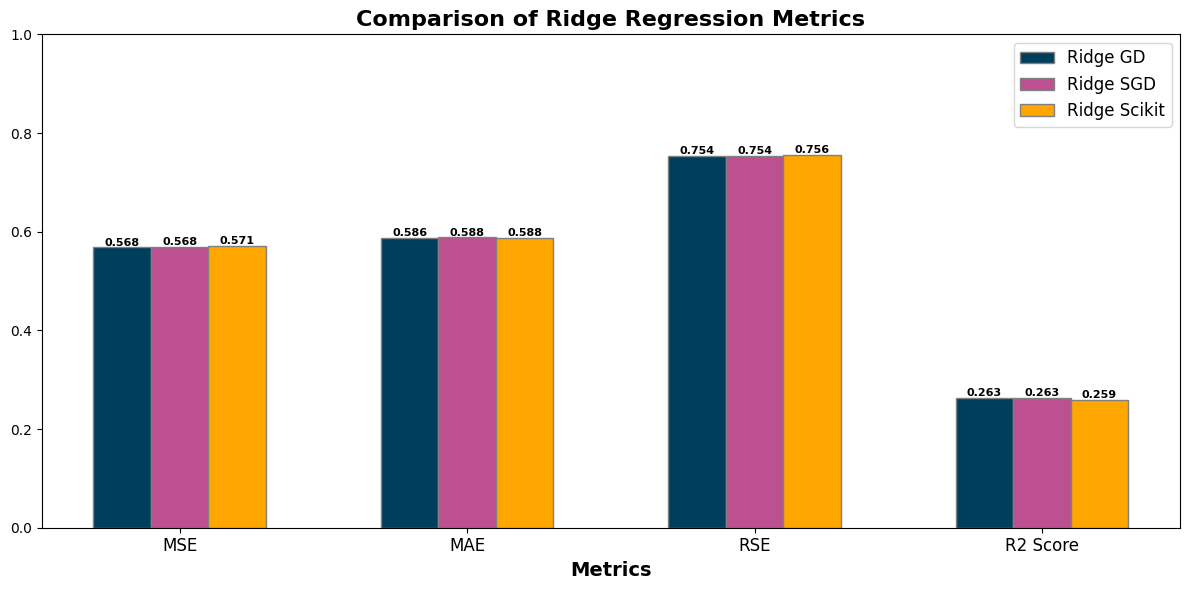

In [217]:
# Metrics
metrics = ['MSE', 'MAE', 'RSE', 'R2 Score']

# Values
gd_scores = [mse_gd, mae_gd, rse_gd, r2_gd]
sgd_scores = [mse_sgd, mae_sgd, rse_sgd, r2_sgd]
scores = [mse, mae, rse, r2]

# Set position of bar on X axis
bar_width = 0.2
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot the figure
plt.figure(figsize=(12, 6))

# Draw the plot
plt.bar(r1, gd_scores, color='#003f5c', width=bar_width, edgecolor='grey', label='Ridge GD')
plt.bar(r2, sgd_scores, color='#bc5090', width=bar_width, edgecolor='grey', label='Ridge SGD')
plt.bar(r3, scores, color='#ffa600', width=bar_width, edgecolor='grey', label='Ridge Scikit')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(metrics))], metrics, fontsize=12)

# Adding the scores on top of the bars
for i in range(len(gd_scores)):
    plt.text(r1[i], gd_scores[i] + 0.01, f'{gd_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r2[i], sgd_scores[i] + 0.01, f'{sgd_scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')
    plt.text(r3[i], scores[i] + 0.01, f'{scores[i]:.3f}', ha='center', va='center', fontsize=8, fontweight='bold')

# Adjust the y-axis limit
plt.ylim(0, 1)

# Add title and legend
plt.title('Comparison of Ridge Regression Metrics', fontweight='bold', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

As we can see our implementations of Ridge GD and Ridge SGD seem to give better scores than the Ridge function from the Scikit library. They both seem to also have similar scores.

Let's also examine the coeffiients that were calculated with these 3 models.

In [218]:
# Extract coefficients
coefficients_model1 = ridge_gd.coefficients[1:]
coefficients_model2 = ridge_sgd.coefficients[1:]
coefficients_model3 = ridge.coef_

# Create a list of feature names
feature_names = wine_quality_white.iloc[:, :-1].columns

df_coeffs = pd.DataFrame(
    {'Ridge GD': coefficients_model1,
     'Ridge SGD': coefficients_model2,
     'Ridge Scikit': coefficients_model3},
    index=feature_names
)
df_coeffs

,Ridge GD,Ridge SGD,Ridge Scikit
fixed acidity,0.020722,-0.020916,-0.015607
volatile acidity,-0.187954,-0.186581,-1.873983
citric acid,-0.005628,0.006235,-0.067259
residual sugar,0.328247,0.247185,0.043959
chlorides,-0.000521,0.012782,-0.285019
free sulfur dioxide,0.081615,0.068129,0.005308
total sulfur dioxide,-0.012943,-0.005627,-0.000499
density,-0.331773,-0.162016,-57.231984
pH,0.093329,0.051627,0.431521
sulphates,0.092603,0.062878,0.746410


We can see that the coefficients slightly differ. For example the **fixed acidity**, **citric acid** and **chlorides** have different signs for GD and SGD Ridge, but the difference is not very big. We can see a big difference for the attribute **residual sugar**, **free sulfur dioxide**, **pH**, and **sulphates** between the Scikit version of Ridge and the other two. An extreme difference is visible for the attribute **density** for which the coeeficient of Ridge Scikit is more than 50 times bigger.

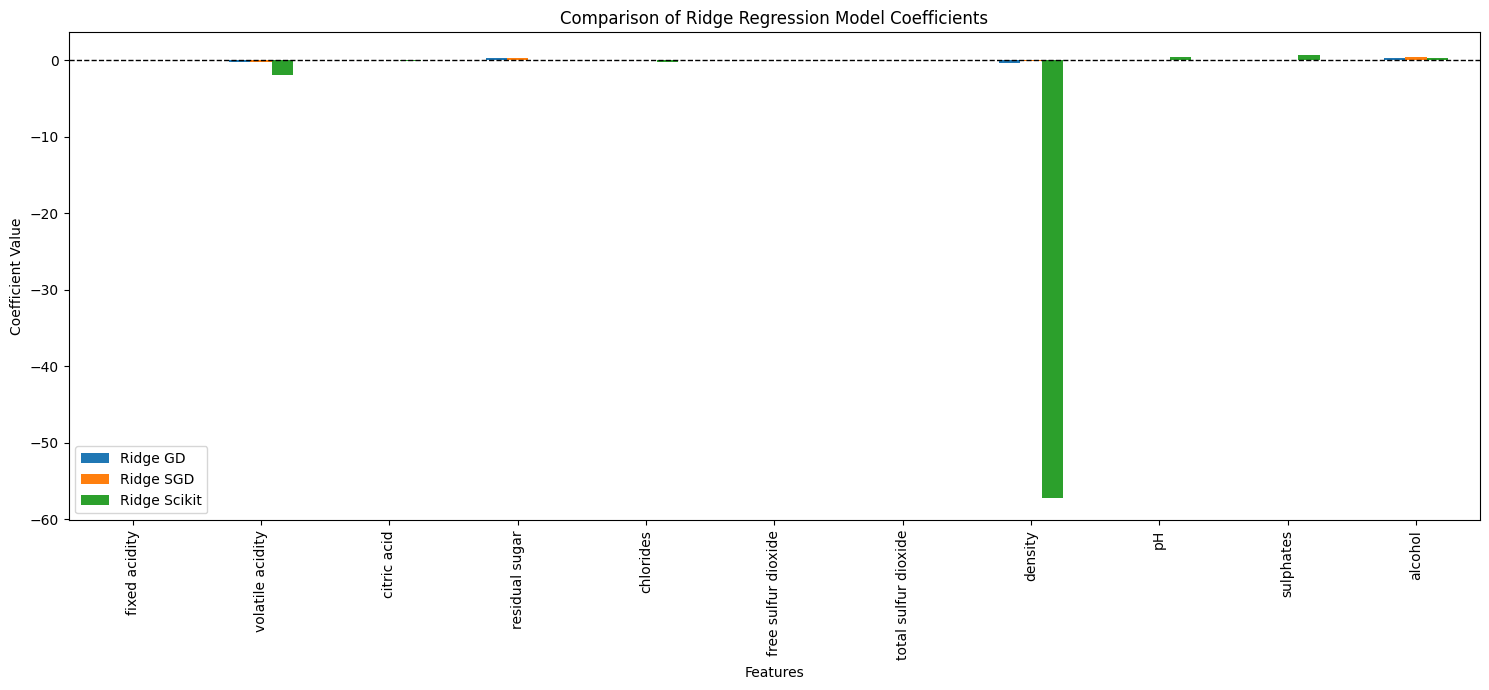

In [219]:
# Visualize the coefficients with a bar plot
df_coeffs.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Ridge Regression Model Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

For most of the attributes we got similar coefficients from each model, but still there are some attributes that have pretty big difference in their value or sign. Since the GD and SGD ridge regressions give better scores, we could say that their coefficients are more valid. So let's only compare their coefficients.

In [220]:
df_coeffs = pd.DataFrame(
    {'Ridge GD': coefficients_model1,
     'Ridge SGD': coefficients_model2},
    index=feature_names
)
df_coeffs

,Ridge GD,Ridge SGD
fixed acidity,0.020722,-0.020916
volatile acidity,-0.187954,-0.186581
citric acid,-0.005628,0.006235
residual sugar,0.328247,0.247185
chlorides,-0.000521,0.012782
free sulfur dioxide,0.081615,0.068129
total sulfur dioxide,-0.012943,-0.005627
density,-0.331773,-0.162016
pH,0.093329,0.051627
sulphates,0.092603,0.062878


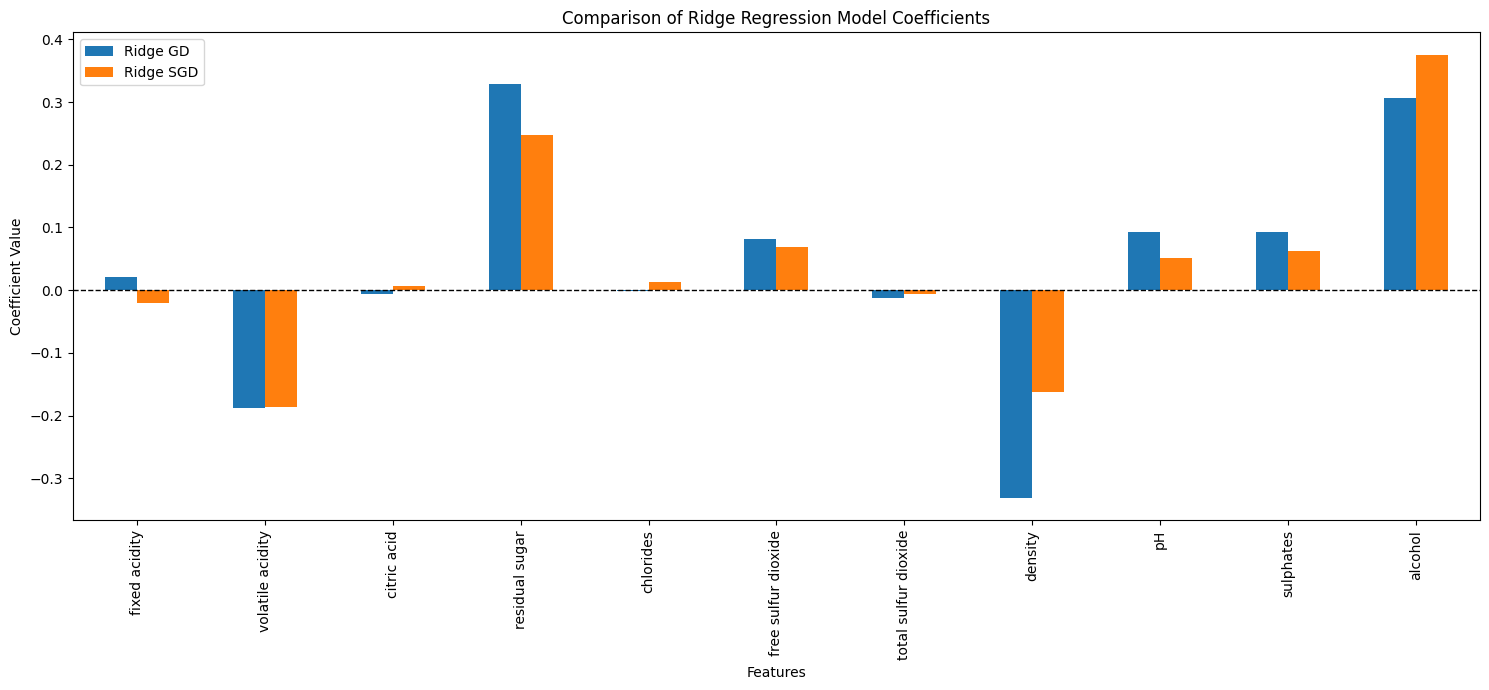

In [221]:
# Visualize the coefficients with a bar plot
df_coeffs.plot(kind='bar', figsize=(15, 7))
plt.title('Comparison of Ridge Regression Model Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Here we can clearly see how important are different attributes for the prediction in both Ridge implementations.